## Data Analyse  

### Démarche :
 - Define measurable objectif: 
   - Objectif : The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
   - Métrique : F1 -> 50% et Recall -> 70%. 
     - Précision : reduces the number of false positives as much as possible.
     - Recall (sensibilitéy : reduces the number of false negatives as much as possible.
     - Score F1.
 - EDA (Exploratory data analysis)
 - Pre-processing.
 - Modeling

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as st
from sklearn.preprocessing import scale

## Exploratory Data Analysis

Objective: to understand as much as possible the available data to define a modeling strategy.

### Forme analysis:
 - target Identification  : y (subscribed)
 - number of rows and columns : (41188, 21)
 - NAs identification: 0
 - Types of variables
	

### deep analysis:
 -  target Visualisation  (histogramme/boxplot)
 - variables' comprehension.
 - Relation Visualisation : features/target
 - Outliers identification 


### Pre-processing

#### Objective: transform data into a format suitable for machine learning : 
-  Train Set / Test Set
- NaN Treatement : dropna(), imputation, colonne"vides"
- Encodage
- Droop outliers
- Feature selection
- Feature engineering
- Feature scaling

### Modelling

Objectif: develop a machine learning model capable of responding to the final objective: 
- Define evaluation function
- Models training
- Optimisation with GridSearchCV
- Errors evaluation
- Learning Curve et prise de décision

In [3]:
df= pd.read_csv('../input/bank-marketing/bank-additional-full.csv', sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Data Set Information in : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing# 



### Analyse de la forme des données.

In [5]:
data = df.copy()

In [6]:
data.shape

(41188, 21)

In [7]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
data.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

<AxesSubplot:ylabel='y'>

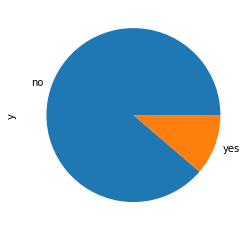

In [9]:
data['y'].value_counts().plot.pie()

### Analyse de fond

### Histogrammes des variables quantitatives

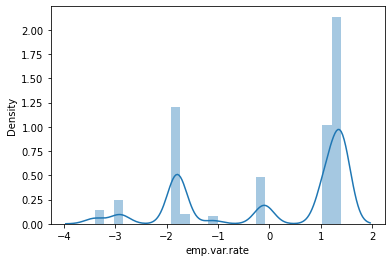

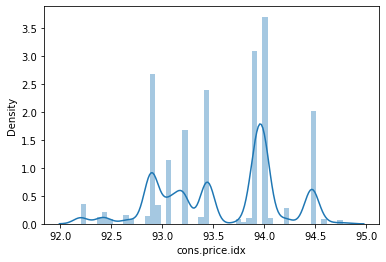

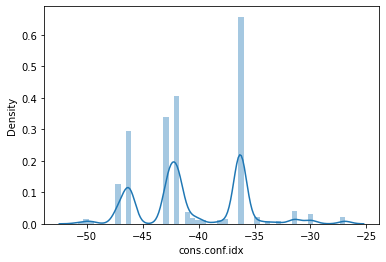

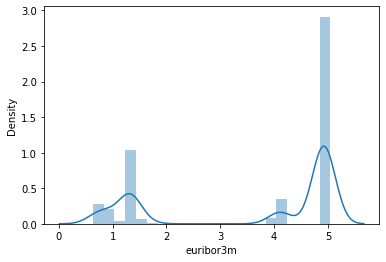

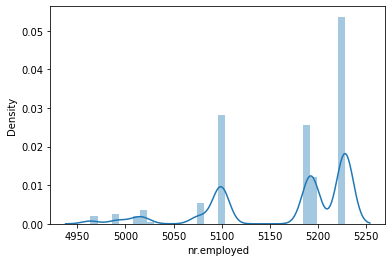

In [10]:
for col in data.select_dtypes('float64'):
    plt.figure()
    sb.distplot(data[col])

In [11]:
for col in data.select_dtypes('object'):
    print(col, data[col].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


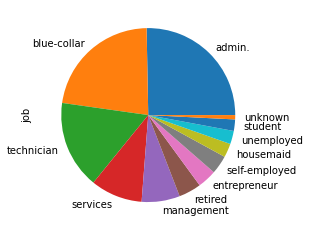

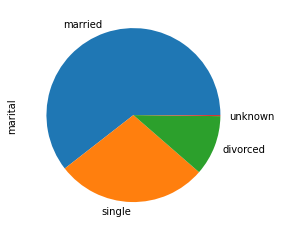

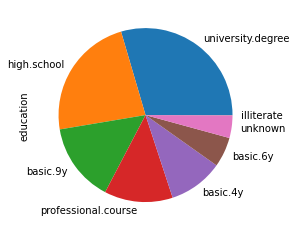

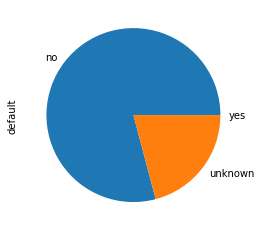

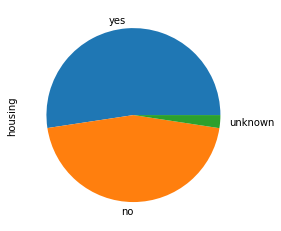

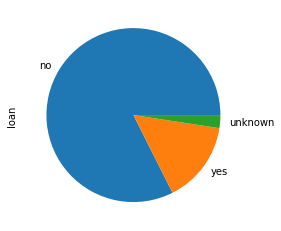

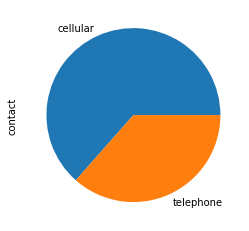

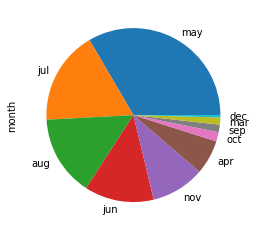

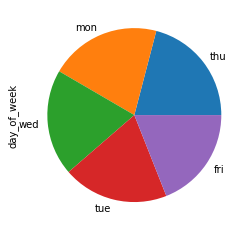

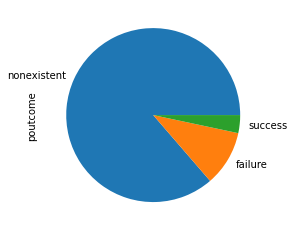

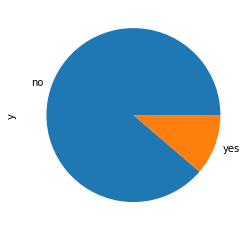

In [12]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

### Relation Target/variable

#### Création des sous ensemble : yes et non no

<AxesSubplot:xlabel='age', ylabel='count'>

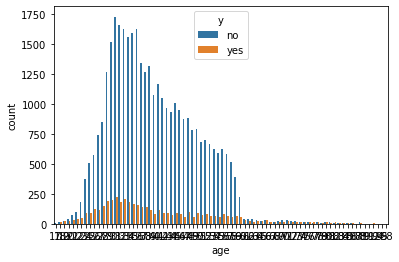

In [13]:
sb.countplot(x ='age', hue = 'y', data = data)

<AxesSubplot:xlabel='cons.price.idx', ylabel='count'>

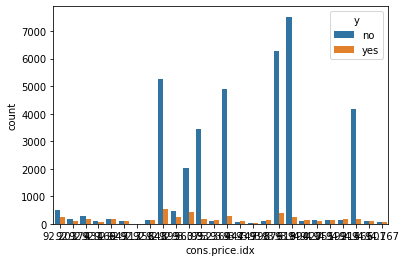

In [14]:
sb.countplot(x ='cons.price.idx', hue = 'y', data = data)

In [15]:
pd.crosstab(data['y'], data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293
yes,1352,638,124,106,328,434,149,323,275,730,144,37


In [16]:
for col in data.select_dtypes('object'):
    print(pd.crosstab(data['y'],data[col]))

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     9070         8616          1332        954        2596     1286   
yes    1352          638           124        106         328      434   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1272      3646      600        6013         870      293  
yes            149       323      275         730         144       37  
marital  divorced  married  single  unknown
y                                          
no           4136    22396    9948       68
yes           476     2532    1620       12
education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y                                                                  
no             3748      2104      5572         8484          14   
yes             428       188  

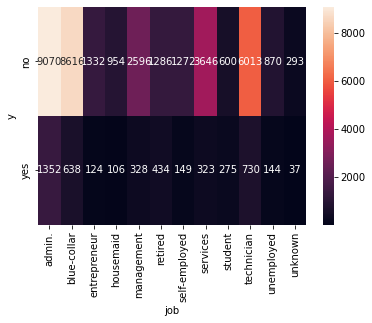

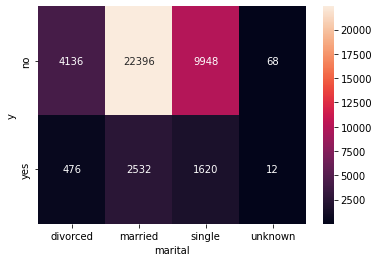

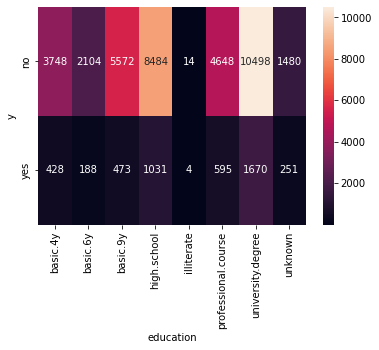

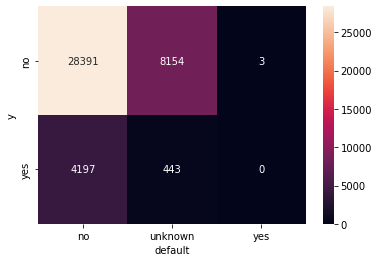

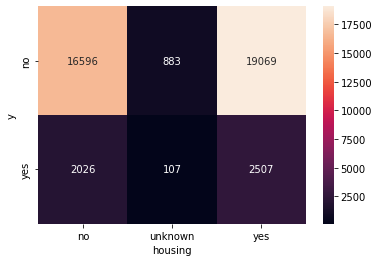

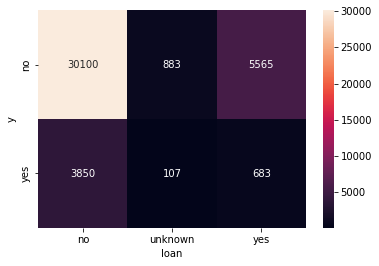

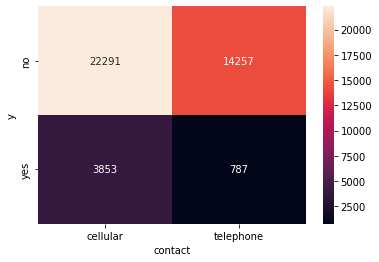

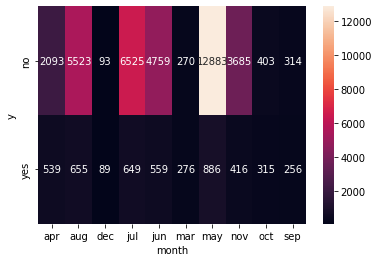

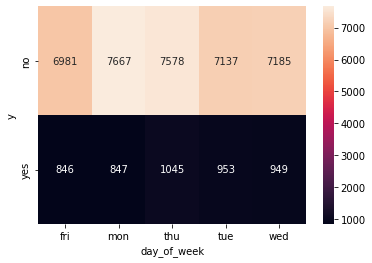

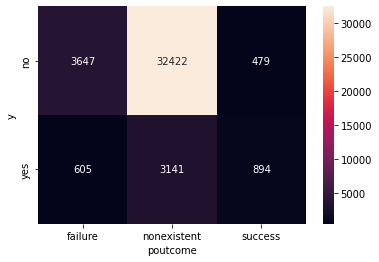

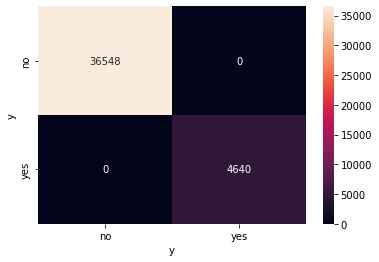

In [17]:
for col in  data.select_dtypes('object'):
    plt.figure()
    sb.heatmap(pd.crosstab(data['y'], data[col]), annot=True, fmt = 'd')

## Pre-processing
- Objectif: Mettre les données dans un format propice au ML
  -  Train/Test
  - Encodage
  - Nettoyage des NaN

### Encodage

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
for col in df.select_dtypes('object'):
  data[col] = le.fit_transform(data[col])

### Train-Test-Encodage-Nettoyage

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
Y = data['y']
X = data.drop(columns='y')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [23]:
y_train.value_counts()

0    25621
1     3210
Name: y, dtype: int64

In [24]:
y_test.value_counts()

0    10927
1     1430
Name: y, dtype: int64

### Modelisation

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [26]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False) ,SelectKBest(f_classif, k = 4))

In [27]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
LogReg = make_pipeline(preprocessor, StandardScaler(), LogisticRegression())

In [28]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

In [29]:
list_model = {'RandomForest': RandomForest, 'AdaBoost': AdaBoost, 
              'SVM': SVM, 'KNN': KNN, 'LogisticReg' : LogReg}

In [30]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv = 4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis = 1))
    plt.plot(N, val_score.mean(axis = 1))

RandomForest
[[10445   482]
 [  824   606]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10927
           1       0.56      0.42      0.48      1430

    accuracy                           0.89     12357
   macro avg       0.74      0.69      0.71     12357
weighted avg       0.88      0.89      0.89     12357

AdaBoost
[[10748   179]
 [ 1134   296]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10927
           1       0.62      0.21      0.31      1430

    accuracy                           0.89     12357
   macro avg       0.76      0.60      0.63     12357
weighted avg       0.87      0.89      0.87     12357

SVM
[[10678   249]
 [  965   465]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10927
           1       0.65      0.33      0.43      1430

    accuracy                           0.90     12357
   macro 

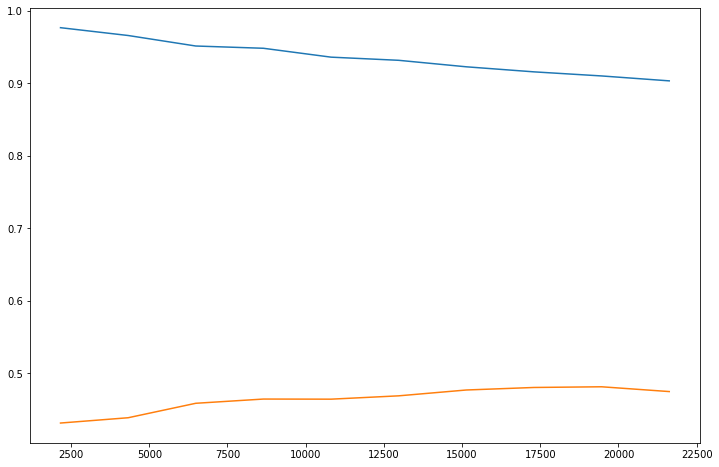

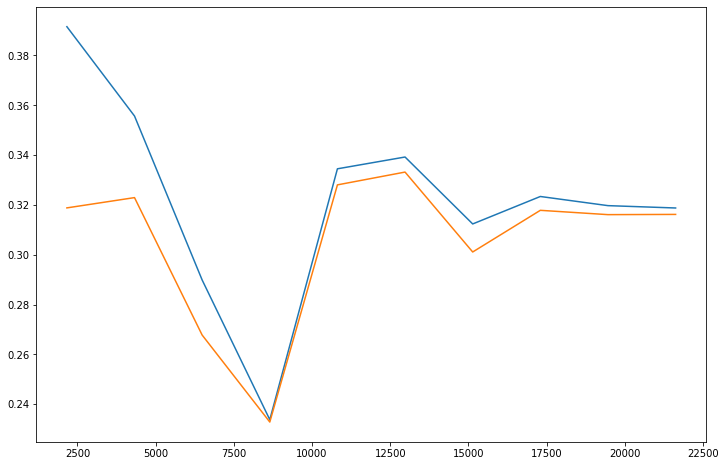

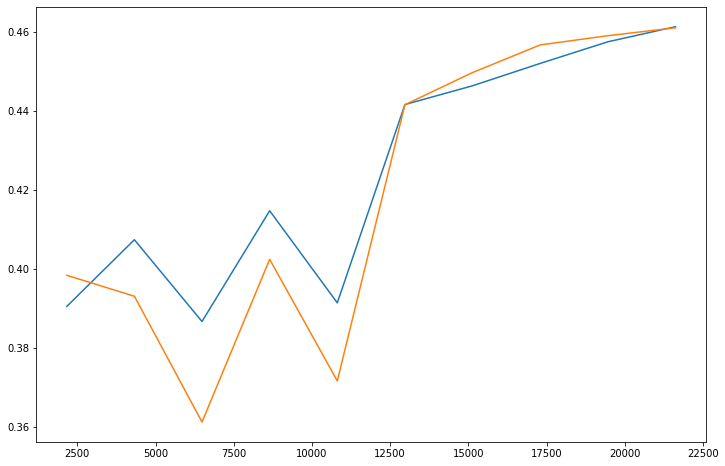

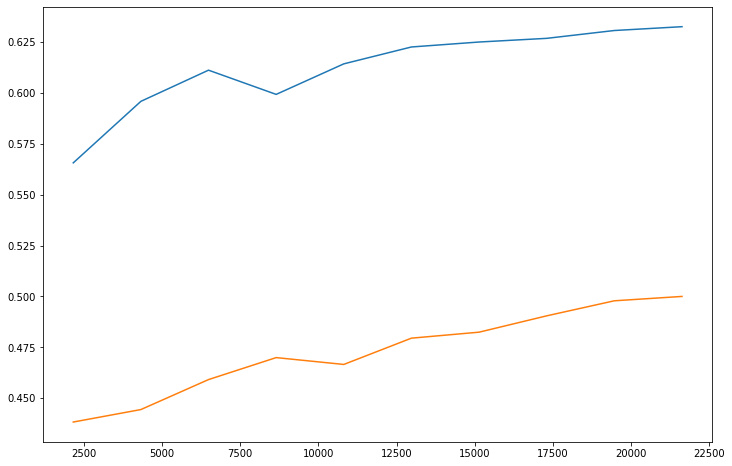

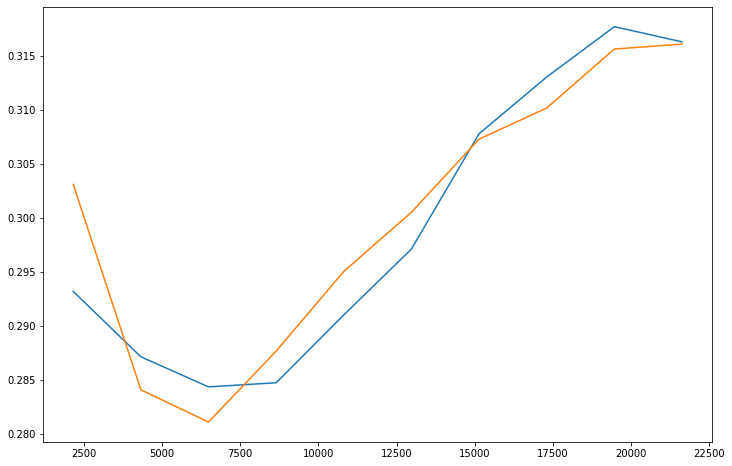

In [31]:
for name, model in list_model.items():
    print(name)
    evaluation(model)

### Procédure d'évaluation 

### Optimisation

In [32]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=4))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [33]:
hyper_param = {'svc__gamma': [1e-3, 1e-4], 
               'svc__C': [1,10,100,1000],
              'pipeline__polynomialfeatures__degree': [2,3,4]}

In [34]:
grid = RandomizedSearchCV(SVM, hyper_param, scoring='recall', cv=4, n_iter=10)

In [35]:
grid.fit(X_train,y_train)
print(grid.best_params_)
ypred = grid.predict(X_test)
print(classification_report(y_test,ypred))

{'svc__gamma': 0.001, 'svc__C': 100, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10927
           1       0.71      0.21      0.32      1430

    accuracy                           0.90     12357
   macro avg       0.81      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



[[10808   119]
 [ 1133   297]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10927
           1       0.71      0.21      0.32      1430

    accuracy                           0.90     12357
   macro avg       0.81      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



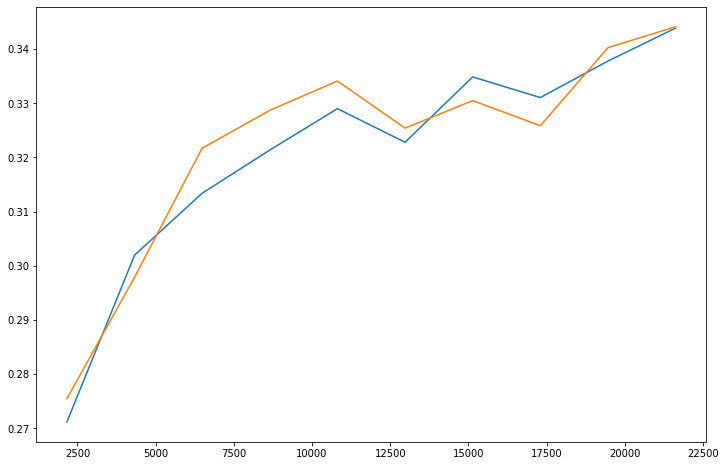

In [36]:
evaluation(grid.best_estimator_)

### Precision Recall Curve

In [37]:
from sklearn.metrics import precision_recall_curve

In [38]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

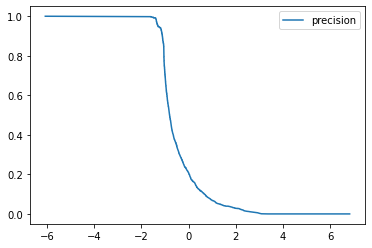

In [39]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))
plt.plot(threshold,recall[:-1], label = 'precision')
plt.legend()

In [40]:
LogReg

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=4))])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [41]:
model_final = LogisticRegression()

In [42]:
model.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=4))])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [43]:
param = {'tol' :np.linspace(0.00001,1,5), 'C': [1.0,2,3,4,5]}

In [44]:
Grid = RandomizedSearchCV(model_final, param, cv = 4, n_iter=10)

In [45]:
Grid.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=LogisticRegression(),
                   param_distributions={'C': [1.0, 2, 3, 4, 5],
                                        'tol': array([1.000000e-05, 2.500075e-01, 5.000050e-01, 7.500025e-01,
       1.000000e+00])})

In [46]:
print(Grid.best_params_)
ypredL = Grid.predict(X_test)
print(classification_report(y_test,ypredL))

{'tol': 0.7500025, 'C': 2}
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10927
           1       0.64      0.36      0.46      1430

    accuracy                           0.90     12357
   macro avg       0.78      0.67      0.70     12357
weighted avg       0.89      0.90      0.89     12357



In [47]:
confusion_matrix(y_test,ypredL)

array([[10646,   281],
       [  921,   509]])

In [48]:
confusion_matrix(y_test,ypred)

array([[10808,   119],
       [ 1133,   297]])

In [49]:
ypredk = KNN.predict(X_test)

In [50]:
confusion_matrix(y_test,ypredk)

array([[10506,   421],
       [  841,   589]])

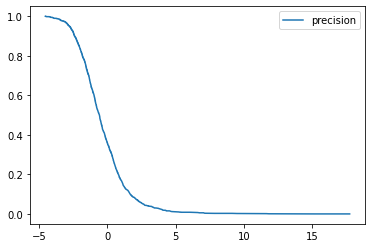

In [51]:
precision, recall, threshold = precision_recall_curve(y_test,Grid.best_estimator_.decision_function(X_test))
plt.plot(threshold,recall[:-1], label = 'precision')
plt.legend()

# deal with Imbalanced Classes

### Random under-sampling with imblearn
RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [52]:
import imblearn
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, Y)

In [53]:
print("original data shape", X.shape)
print("Under-sampling data shape", x_rus.shape)

original data shape (41188, 20)
Under-sampling data shape (9280, 20)


<AxesSubplot:ylabel='y'>

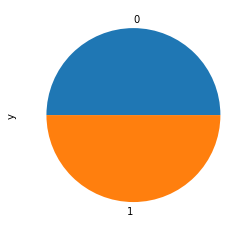

In [54]:
y_rus.value_counts().plot.pie()

## Modeling

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_rus,y_rus, test_size=0.3)

In [56]:
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                               cv = 4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis = 1))
    plt.plot(N, val_score.mean(axis = 1))

RandomForest
[[1138  264]
 [ 222 1160]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1402
           1       0.81      0.84      0.83      1382

    accuracy                           0.83      2784
   macro avg       0.83      0.83      0.83      2784
weighted avg       0.83      0.83      0.83      2784

AdaBoost
[[1201  201]
 [ 220 1162]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1402
           1       0.85      0.84      0.85      1382

    accuracy                           0.85      2784
   macro avg       0.85      0.85      0.85      2784
weighted avg       0.85      0.85      0.85      2784

SVM
[[1137  265]
 [ 128 1254]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1402
           1       0.83      0.91      0.86      1382

    accuracy                           0.86      2784
   macro avg       0.

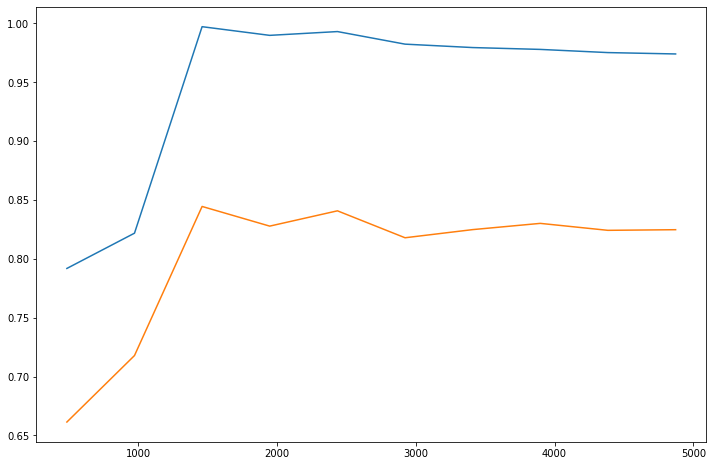

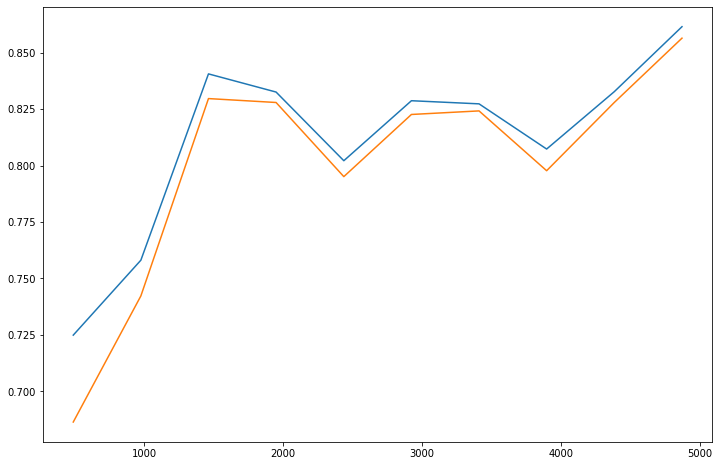

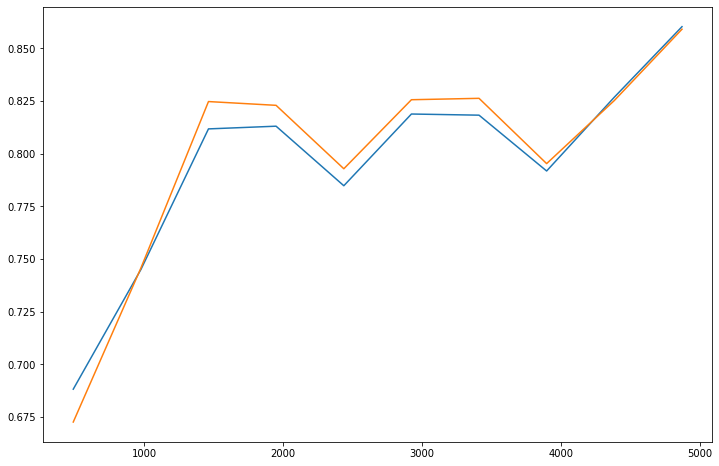

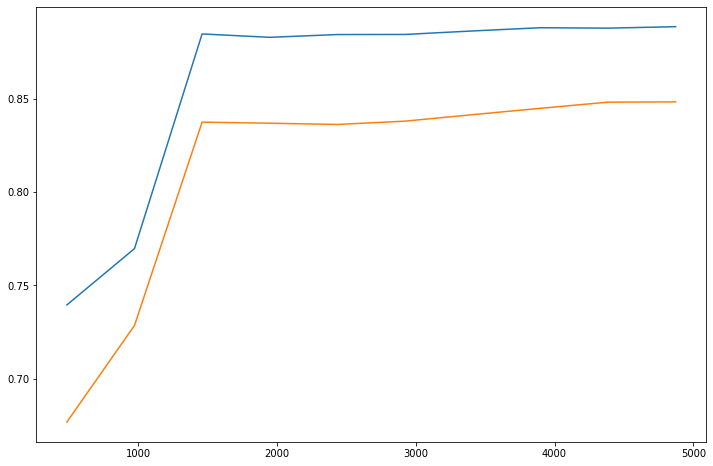

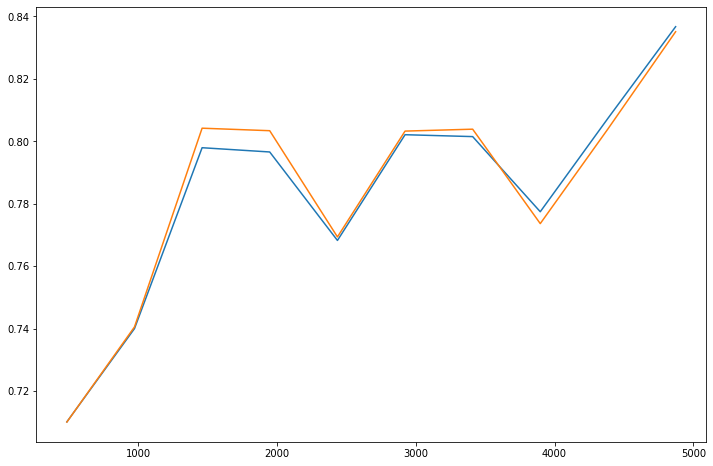

In [57]:
for name, model in list_model.items():
    print(name)
    evaluation(model)

### Optimisation

In [58]:
grid.fit(x_train,y_train)
print(grid.best_params_)
ypred = grid.predict(x_test)
print(classification_report(y_test,ypred))

{'svc__gamma': 0.001, 'svc__C': 100, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1402
           1       0.82      0.87      0.85      1382

    accuracy                           0.84      2784
   macro avg       0.84      0.84      0.84      2784
weighted avg       0.84      0.84      0.84      2784



[[1144  258]
 [ 181 1201]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1402
           1       0.82      0.87      0.85      1382

    accuracy                           0.84      2784
   macro avg       0.84      0.84      0.84      2784
weighted avg       0.84      0.84      0.84      2784



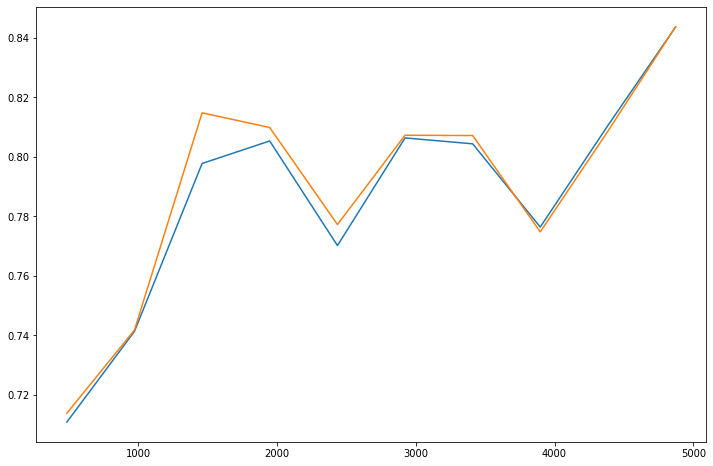

In [59]:
evaluation(grid.best_estimator_)

### LOGREG

{'tol': 0.500005, 'C': 1.0}
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1402
           1       0.84      0.86      0.85      1382

    accuracy                           0.85      2784
   macro avg       0.85      0.85      0.85      2784
weighted avg       0.85      0.85      0.85      2784



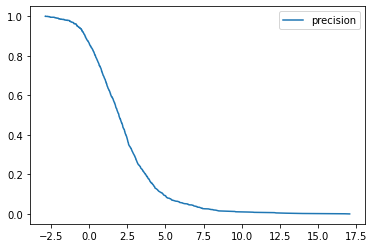

In [60]:
param = {'tol' :np.linspace(0.00001,1,5), 'C': [1.0,2,3,4,5]}

Grid = RandomizedSearchCV(model_final, param, cv = 4, n_iter=10)
Grid.fit(x_train,y_train)
print(Grid.best_params_)
ypredL = Grid.predict(x_test)
print(classification_report(y_test,ypredL))
precision, recall, threshold = precision_recall_curve(y_test,Grid.best_estimator_.decision_function(x_test))
plt.plot(threshold,recall[:-1], label = 'precision')
plt.legend()

## Random OverSampler
One way to fight imbalance data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler offers such a scheme.

In [61]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=21)
x_ros, y_ros = ros.fit_resample(X, Y)

In [62]:
print("original data shape", X.shape)
print("Overer-sampling data shape", x_ros.shape)

original data shape (41188, 20)
Overer-sampling data shape (73096, 20)


<AxesSubplot:ylabel='y'>

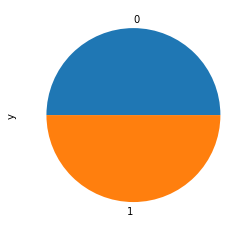

In [63]:
y_ros.value_counts().plot.pie()

### Modeling

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros, test_size=0.3)

In [65]:
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                               cv = 4, scoring = 'f1',
                                               train_sizes = np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis = 1))
    plt.plot(N, val_score.mean(axis = 1))

RandomForest
[[ 9960   966]
 [   46 10957]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     10926
           1       0.92      1.00      0.96     11003

    accuracy                           0.95     21929
   macro avg       0.96      0.95      0.95     21929
weighted avg       0.96      0.95      0.95     21929

AdaBoost
[[9346 1580]
 [1259 9744]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10926
           1       0.86      0.89      0.87     11003

    accuracy                           0.87     21929
   macro avg       0.87      0.87      0.87     21929
weighted avg       0.87      0.87      0.87     21929

SVM
[[ 8906  2020]
 [  947 10056]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     10926
           1       0.83      0.91      0.87     11003

    accuracy                           0.86     21929
   macro avg 

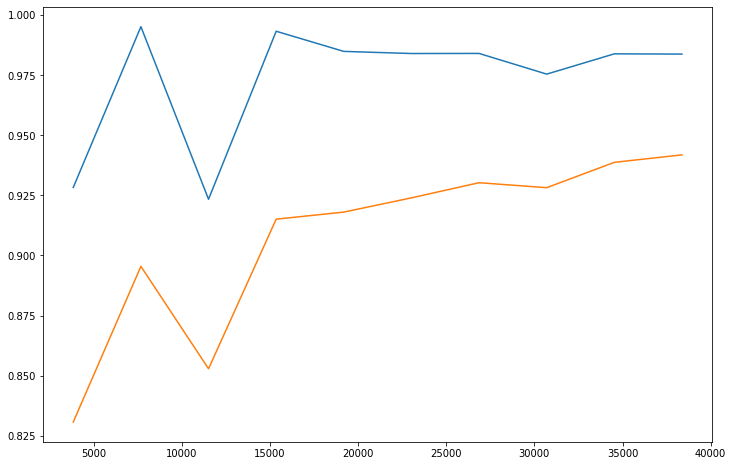

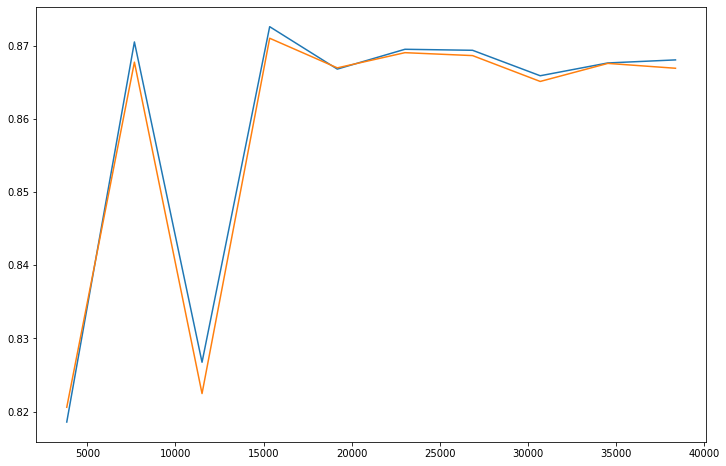

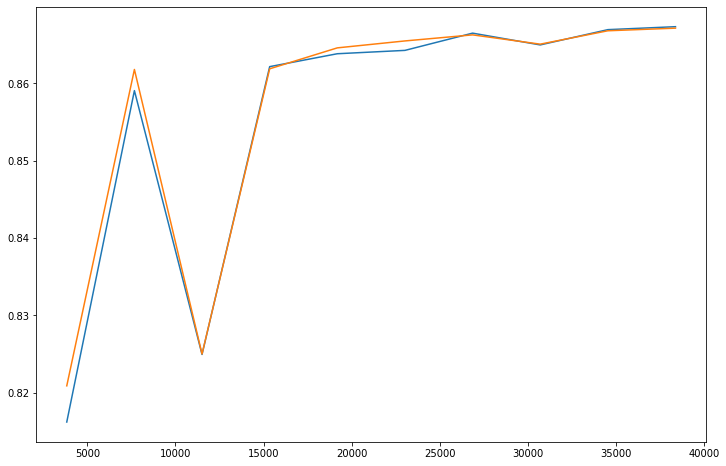

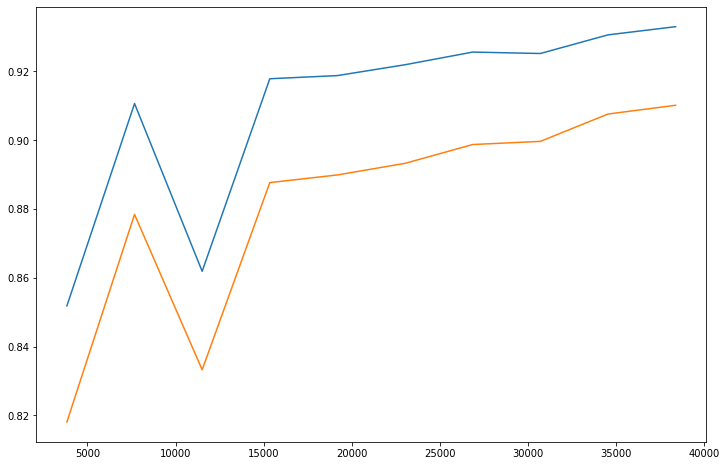

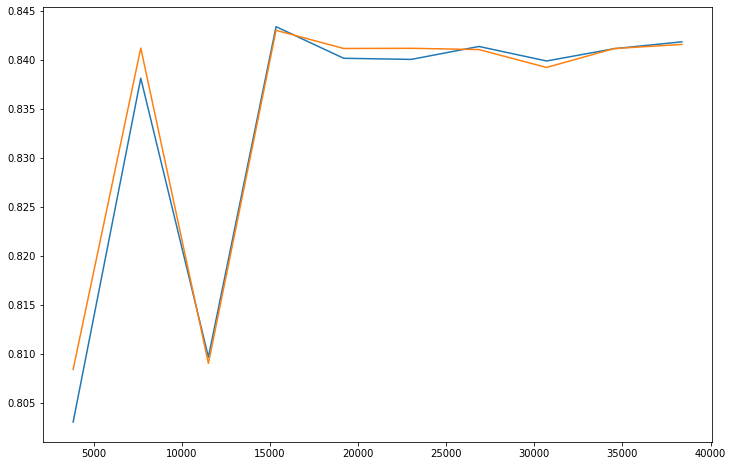

In [66]:
for name, model in list_model.items():
    print(name)
    evaluation(model)